In [11]:
import random

import numpy as np
import matplotlib.pyplot as plt
import gymnasium
from tqdm import tqdm
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import torch
import torch.nn.functional as F
import torch.distributions as dist
from torch import nn
import cloudpickle
import sklearn
from sklearn import preprocessing
torch.set_grad_enabled(True) 

In [13]:
class Network(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(3,64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Linear(64,1)
        )
    
    def forward(self, x):
        x = self.network(x)
        return x

In [14]:
def train_one_step(network: Network,optim:torch.optim.Optimizer, x:torch.Tensor,y:torch.Tensor):
    network.train()
    out = network(x)
    loss = F.mse_loss(y.detach(),out)
    optim.zero_grad()
    loss.backward()
    optim.step()
    return loss.item()

In [36]:
def seed(s:int):
    random.seed(s)
    torch.manual_seed(s)

In [150]:
NUM_STEPS = 100000
BATCH_SIZE = 32
MULTIPLIER = 1
OBS_SIZE = 3
seed(22)
network = Network()
optim = torch.optim.SGD(network.parameters(),lr=1e-3)
loss_lst = []
for i in tqdm(range(NUM_STEPS)):
    loc = MULTIPLIER*torch.randn((BATCH_SIZE,)).unsqueeze(1).repeat(1,OBS_SIZE)
    scale = MULTIPLIER*torch.randn((BATCH_SIZE,)).unsqueeze(1).repeat(1,OBS_SIZE)
    obs = scale*torch.randn((BATCH_SIZE,3)) + loc
    y = torch.mean(obs,dim=-1)
    loss = train_one_step(network,optim,obs,y.unsqueeze(1))
    loss_lst.append(loss)
print("Mean loss is",np.mean(loss_lst[-10:]))

100%|██████████| 100000/100000 [00:15<00:00, 6609.69it/s]

Mean loss is 0.01487863385118544


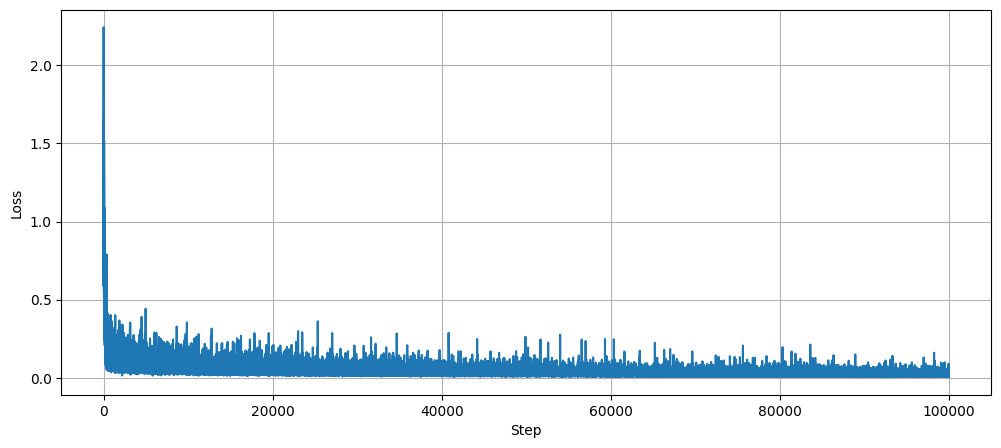

In [151]:
plt.figure(figsize=(12,5))
plt.plot(range(NUM_STEPS),loss_lst)
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid()

In [152]:
network.eval()
network(torch.tensor([100,200,500],dtype=torch.float))

tensor([117.3703], grad_fn=<AddBackward0>)